# Библиотеки Python для Data Science: Numpy, Matplotlib, Scikit-learn
# Курсовой Проект Ершова Андрея Александровича

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

pd.options.display.max_columns = 100

In [3]:
TRAIN_MODEL_PATH = 'c:\\Users\\andre\\source\\repos\\python\\DataScience\\project_task\\train.csv'
TEST_MODEL_PATH = 'c:\\Users\\andre\\source\\repos\\python\\DataScience\\project_task\\test.csv'

In [ ]:
df = pd.read_csv(TRAIN_MODEL_PATH)

###### Описание датасета:

$Id$ : идентификационный номер квартиры
<br>
$DistrictId$ : идентификационный номер района
<br>
$Rooms$ : количество комнат
<br>
$Square$ : площадь
<br>
$LifeSquare$ : жилая площадь
<br>
$KitchenSquare$ : площадь кухни
<br>
$Floor$ : этаж
<br>
$HouseFloor$ : количество этажей в доме
<br>
$HouseYear$ : год постройки дома
<br>
$Ecology\_1, Ecology\_2, Ecology\_3$ : экологические показатели местности
<br>
$Social\_1, Social\_2, Social\_3$ : социальные показатели местности
<br>
$Healthcare\_1, Helthcare\_2$ : показатели местности, связанные с охраной здоровья
<br>
$Shops\_1, Shops\_2$ : показатели, связанные с наличием магазинов, торговых центров
<br>
$Price$ : цена квартиры

In [4]:
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


#### Библиотечные функции

In [130]:
def getStatisticsByColumn(columnName, asc=True):
    group = df.groupby(columnName)
    df_stat = pd.DataFrame(group.apply(lambda x: x[columnName].unique()[0]))
    df_stat.columns = [columnName]
    df_stat.loc[:,'Count'] = group.apply(lambda x: x[columnName].count())
    df_stat.reset_index(inplace=True, drop=True)
    return df_stat.sort_values(by=columnName, axis=0, ascending=asc)

In [133]:
def fillEmptyObservationsByMedian(columnName):
    mdn = df[columnName].median()
    df[columnName] = df[columnName].fillna(mdn)
    return 0

In [135]:
def transformCategorialToBinary(columnName):
    matching = filter(lambda column: columnName in column, df.columns)

    if len(list(matching)) > 0:
        df = pd.concat([df, pd.get_dummies(df[columnName])], axis=1)
        df.rename(columns={"A": columnName.join("A"), "B": columnName.join("B")}, inplace=True)
        df.drop(columnName, axis=1, inplace=True)
    return 0

#### Предварительная корректировка модели

Признаки $LifeSquare$ и $Healthcare\_1$ имеют высокую степень разряжения. Заполняем отсутсвующие в этих столбцах значения соотвествующими медианными значениями. 

In [6]:
#df.loc[df['LifeSquare'].isnull(), 'LifeSquare'] = df['LifeSquare'].median()
#df.loc[df['Healthcare_1'].isnull(), 'Healthcare_1'] = df['Healthcare_1'].median()
fillEmptyObservationsByMedian('LifeSquare')
fillEmptyObservationsByMedian('Healthcare_1')

Преобразуем категориальные признаки $Ecology\_2$, $Ecology\_3$ и $Shops\_2$ в несколько бинарных

In [7]:
transformCategorialToBinary('Ecology_2')
transformCategorialToBinary('Ecology_3')
transformCategorialToBinary('Shops_2')

#matching = filter(lambda column: 'Ecology_2A' in column, df.columns)
#if len(list(matching)) < 1:
#    df = pd.concat([df, pd.get_dummies(df['Ecology_2'])], axis=1)
#    df.rename(columns={"A": "Ecology_2A", "B": "Ecology_2B"}, inplace=True)
#    df.drop("Ecology_2", axis=1, inplace=True)

Избавляемся от $мультиколлинеарности$.
<br>
;lkj;lkj;lk

In [10]:
df.drop("Ecology_2B", axis=1, inplace=True)
df.drop("Ecology_3B", axis=1, inplace=True)
df.drop("Shops_2B", axis=1, inplace=True)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2A,Ecology_3A,Shops_2A
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,33,7976,5,900.0,0,11,184966.930730,0,0,0
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,46,10309,1,240.0,1,16,300009.450063,0,0,0
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,34,7759,0,229.0,1,3,220925.908524,0,0,0
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,23,5735,3,1084.0,0,5,175616.227217,0,0,0
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,35,5776,1,2078.0,2,4,150226.531644,0,0,0


Нормализация поля $DistrictId$

In [81]:
print(getStatisticsByColumn('DistrictId')[:10])

   DistrictId  Count
0         1.0  652.0
1         2.0   78.0
2         3.0   82.0
3         4.0   11.0
4         5.0   34.0
5         6.0  511.0
6         7.0   92.0
7         8.0  142.0
8         9.0  294.0
9        10.0   56.0


In [58]:
df.loc[df.DistrictId == 0, 'DistrictId'] = df.DistrictId.median()

Нормализация поля $Rooms$

In [100]:
print(getStatisticsByColumn('Rooms')[:10])

   Rooms  Count
6      6      1
8     19      1
7     10      2
0      0      8
5      5     18
4      4    150
3      3   2235
1      1   3705
2      2   3880


In [ ]:
df.Rooms = df.Rooms.astype(int)

Нормализация поля $Square$

In [101]:
print(getStatisticsByColumn('Square')[:10])

         Square  Count
0      1.136859    1.0
6663  61.672748    1.0
6664  61.673568    1.0
6665  61.690768    1.0
6666  61.691076    1.0
6667  61.691711    1.0
6668  61.693370    1.0
6669  61.696476    1.0
6670  61.698048    1.0
6671  61.708595    1.0


Нормализация поля $LifeSquare$

In [102]:
print(getStatisticsByColumn('LifeSquare')[:10])

      LifeSquare  Count
0       0.370619    1.0
5264   40.551864    1.0
5263   40.551421    1.0
5262   40.548087    1.0
5261   40.545361    1.0
5260   40.541032    1.0
5259   40.536223    1.0
5258   40.522188    1.0
5257   40.481153    1.0
5256   40.481030    1.0


Нормализация поля $KitchenSquare$

In [131]:
print(getStatisticsByColumn('KitchenSquare')[:10])

   KitchenSquare   Count
0            0.0   697.0
1            1.0  2460.0
2            2.0     4.0
3            3.0    22.0
4            4.0    39.0
5            5.0  1169.0
6            6.0  1043.0
7            7.0   609.0
8            8.0  1306.0
9            9.0   843.0


Нормализация поля $Floor$

In [104]:
print(getStatisticsByColumn('Floor')[:10])

    Floor  Count
32     42      1
30     33      1
28     31      1
31     37      1
29     32      2
27     28      3
26     27      5
25     26     18
22     23     25
24     25     34


Нормализация поля $HouseFloor$

In [91]:
df.HouseFloor = df.HouseFloor.astype(int)

In [105]:
print(getStatisticsByColumn('HouseFloor')[:10])

    HouseFloor  Count
35          38      1
26          26      1
33          36      1
31          31      1
29          29      1
36          39      2
28          28      3
34          37      4
32          32      4
27          27      6


Нормализация поля $HouseYear$

In [106]:
print(getStatisticsByColumn('HouseYear')[:10])

    HouseYear  Count
0        1910      1
95       4968      1
22       1947      1
7        1928      1
96   20052011      1
3        1916      1
2        1914      1
1        1912      2
8        1929      2
11       1932      2


Нормализация поля $Ecology\_1$

In [107]:
print(getStatisticsByColumn('Ecology_1')[:10])

        Ecology_1  Count
21   1.433395e-02    1.0
18   1.252163e-02    1.0
121  3.940942e-01    2.0
15   1.131981e-02    3.0
120  3.867717e-01    6.0
23   1.458072e-02    7.0
105  2.466236e-01    9.0
1    1.800000e-09   10.0
49   5.181543e-02   11.0
9    4.949358e-03   11.0


Нормализация поля $Ecology\_2A$

In [120]:
print(getStatisticsByColumn('Ecology_2A')[:10])

   Ecology_2A  Count
1           1     97
0           0   9903


Нормализация поля $Ecology\_3A$

In [121]:
print(getStatisticsByColumn('Ecology_3A')[:10])

   Ecology_3A  Count
1           1    275
0           0   9725


Нормализация поля $Social\_1$

In [129]:
print(getStatisticsByColumn('Social_1')[:10])

    Social_1  Count
3          3      9
7          7     15
12        12     18
13        13     22
10        10     24
14        14     46
20        20     50
15        15     51
8          8     62
38        38     64


Нормализация поля $Social\_2$

In [109]:
print(getStatisticsByColumn('Social_2')[:10])

    Social_2  Count
7        507      1
8        528      1
11       662      2
17      1423      3
9        568      3
14      1135      6
12       760      7
37      2940      9
48      3681     10
1        186     11


Нормализация поля $Social\_3$

In [110]:
print(getStatisticsByColumn('Social_3')[:10])

    Social_3  Count
19        37      3
21        45      9
25        73     10
20        39     15
16        23     18
15        20     19
14        19     22
28        93     25
24        59     25
27        87     27


Нормализация поля $Healthcare\_1$

In [127]:
print(getStatisticsByColumn('Healthcare_1')[:10])

    Healthcare_1  Count
34           900   4869
22           540    511
1             30    348
40          1046    245
29           750    163
14           229    148
62          2300    142
41          1084    137
15           240    127
44          1183    110


In [ ]:
df.Healthcare_1 = df.Healthcare_1.astype(int)

Нормализация поля $Healthcare\_2$

In [115]:
df.rename(columns={"Helthcare_2": "Healthcare_2"}, inplace=True)

In [116]:
print(getStatisticsByColumn('Healthcare_2')[:10])

   Healthcare_2  Count
6             6     99
4             4    288
5             5    388
2             2   1158
3             3   1670
1             1   2183
0             0   4214


Нормализация поля $Shops\_1$

In [122]:
print(getStatisticsByColumn('Shops_1')[:10])

    Shops_1  Count
14       19     49
13       16     83
12       15    176
10       10    215
15       23    245
8         8    253
7         7    294
9         9    316
11       11    401
6         6    487


Нормализация поля $Shops\_2A$

In [119]:
print(getStatisticsByColumn('Shops_2A')[:10])

   Shops_2A  Count
1         1    825
0         0   9175


#### Анализ модели 

In [12]:
target_mean = round(df.Price.mean(), 2)
target_median = df.Price.median()
target_mode = df.Price.mode()[0]

target_mean, target_median, target_mode

(214138.86, 192269.64487934904, 59174.77802758122)

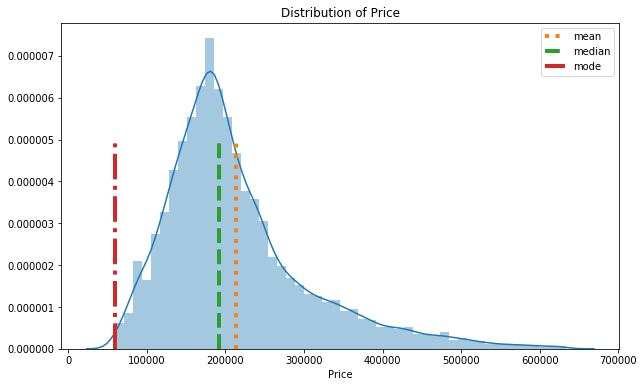

In [13]:
plt.figure(figsize = (10, 6))

sns.distplot(df.Price)

y = np.linspace(0, 0.000005, 100)
plt.plot([target_mean] * 100, y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 100, y, label='median', linestyle='--', linewidth=4)
plt.plot([target_mode] * 100, y, label='mode', linestyle='-.', linewidth=4)

plt.title('Distribution of Price')
plt.legend()
plt.show()

In [147]:
feature_names = df.columns.tolist()[1:]
#feature_names.remove({"Price"})

feature_names_for_stand = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Healthcare_2', 'Shops_1']

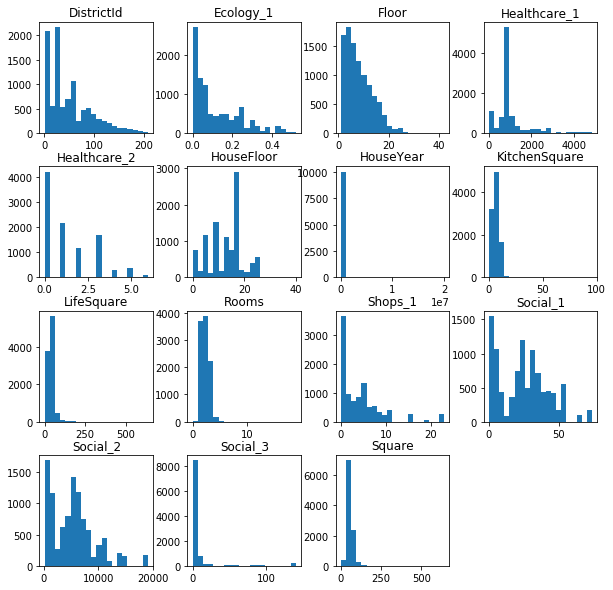

In [148]:
df_num_features = df[feature_names_for_stand]

df_num_features.hist(figsize=(10,10), bins=20, grid=False);

#### Дополнительная корректировка модели 

In [149]:
df.loc[df['LifeSquare'] > 5000, 'LifeSquare'] = df['LifeSquare'].median()
df.loc[df['KitchenSquare'] > 100, 'KitchenSquare'] = df['KitchenSquare'].median()
df.loc[df['HouseFloor'] > 40, 'HouseFloor'] = df['HouseFloor'].median()

#### Подготовка и обучение модели

In [150]:
X = df[feature_names_for_stand]
y = df[['Price']]

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
DistrictId       10000 non-null float64
Rooms            10000 non-null int32
Square           10000 non-null float64
LifeSquare       10000 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     10000 non-null int32
Healthcare_2     10000 non-null int64
Shops_1          10000 non-null int64
dtypes: float64(6), int32(2), int64(7)
memory usage: 1.1 MB


In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [152]:
rfr = RandomForestRegressor(n_estimators=1000, max_depth=400, random_state=42)

In [153]:
%%time

rfr.fit(X_train, y_train.values[:, 0])

Wall time: 55.7 s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=400,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

#### Предсказание и анализ результатов

In [154]:
y_pred = rfr.predict(X_test)

In [155]:
check_test_rfr = pd.DataFrame({
    "y_test": y_test["Price"],
    "y_pred": y_pred.flatten()
})

check_test_rfr["error"] = check_test_rfr["y_pred"] - check_test_rfr["y_test"]

check_test_rfr.head()

,y_test,y_pred,error
6252,181530.459031,182944.291493,1413.832463
4684,260456.004692,275108.033381,14652.028689
1731,219945.304640,216896.390067,-3048.914573
4742,66883.280318,66622.707532,-260.572786
4521,114086.065201,121174.442862,7088.377661


In [156]:
mean_squared_error(check_test_rfr["y_test"], check_test_rfr["y_pred"])

2405565771.5747924

In [157]:
mean_absolute_error(check_test_rfr["y_test"], check_test_rfr["y_pred"])

28459.18463782066

In [158]:
r2_score(check_test_rfr["y_test"], check_test_rfr["y_pred"]) 

0.7203401199585315

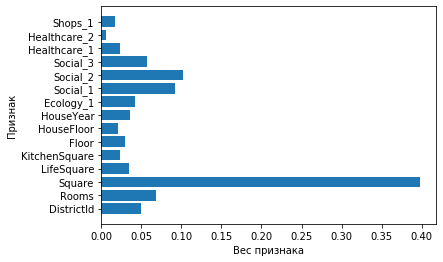

In [160]:
plt.barh(feature_names_for_stand, rfr.feature_importances_.flatten())

plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()

In [161]:
df[feature_names_for_stand].head(10)

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Healthcare_2,Shops_1
0,35.0,2,47.981561,29.442751,6.0,7,9.0,1969,0.089040,33,7976,5,900,0,11
1,41.0,3,65.683640,40.049543,8.0,7,9.0,1978,0.000070,46,10309,1,240,1,16
2,53.0,2,44.947953,29.197612,0.0,8,12.0,1968,0.049637,34,7759,0,229,1,3
3,58.0,2,53.352981,52.731512,9.0,8,17.0,1977,0.437885,23,5735,3,1084,0,5
4,99.0,1,39.649192,23.776169,7.0,11,12.0,1976,0.012339,35,5776,1,2078,2,4
5,59.0,3,80.384479,46.683720,12.0,5,17.0,2011,0.309479,35,7715,4,990,0,6
6,154.0,2,62.254114,37.160377,7.0,3,5.0,1960,0.460556,20,4386,14,900,1,5
7,74.0,2,80.312926,32.781260,0.0,14,0.0,1977,0.075779,6,1437,3,900,0,2
8,1.0,2,64.511437,32.781260,1.0,9,17.0,1977,0.007122,1,264,0,900,0,1
9,23.0,1,46.461409,18.915552,8.0,13,17.0,2014,0.075779,6,1437,3,900,0,2


In [165]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
stand_features = scaler.fit_transform(df[feature_names_for_stand])

In [166]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled)

In [167]:
%%time

rfr.fit(X_train_scaled, y_train)

Wall time: 55.3 s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=400,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

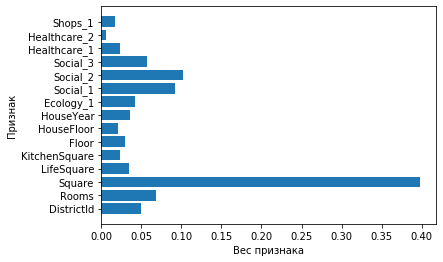

In [168]:
plt.barh(feature_names_for_stand, rfr.feature_importances_.flatten())

plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()

In [169]:
y_pred = rfr.predict(X_test_scaled)

In [170]:
check_test_rfr = pd.DataFrame({
    "y_test": y_test["Price"],
    "y_pred": y_pred.flatten()
})

check_test_rfr["error"] = check_test_rfr["y_pred"] - check_test_rfr["y_test"]

check_test_rfr.head()

,y_test,y_pred,error
6252,181530.459031,192905.816945,11375.357915
4684,260456.004692,293789.893768,33333.889075
1731,219945.304640,213618.317584,-6326.987056
4742,66883.280318,69458.406205,2575.125887
4521,114086.065201,128994.863509,14908.798308


In [171]:
r2_score(check_test_rfr["y_test"], check_test_rfr["y_pred"]) 

0.6737931224416502

#### Проверка на перобучение

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [173]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [174]:
y_pred = lr.predict(X_test)

In [175]:
check_test_lr = pd.DataFrame({
    "y_test": y_test["Price"],
    "y_pred": y_pred.flatten(),
})

check_test_lr["error"] = check_test_lr["y_pred"] - check_test_lr["y_test"]

check_test_lr.head()

,y_test,y_pred,error
6252,181530.459031,175965.735557,-5564.723473
4684,260456.004692,259785.422553,-670.582139
1731,219945.304640,224860.584386,4915.279745
4742,66883.280318,93306.144554,26422.864236
4521,114086.065201,165525.811716,51439.746515


In [176]:
mean_squared_error(check_test_lr["y_test"], check_test_lr["y_pred"])

4664867690.361294

In [177]:
mean_absolute_error(check_test_lr["y_test"], check_test_lr["y_pred"])

45198.51679212216

In [178]:
r2_score(check_test_lr["y_test"], check_test_lr["y_pred"]) 

0.4576841946658866

Вот, собссно, как-то так...